In [8]:
import pandas as pd #for analyze
import numpy  as np #for vector
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization
from matplotlib.colors import ListedColormap

# ML library
from sklearn.preprocessing import StandardScaler #for standartization
from sklearn.model_selection import train_test_split, GridSearchCV #verisetini train ve test olarak ayırır, KNN ile ilgili best parametreleri seçerken kullanırız
from sklearn.metrics import accuracy_score, confusion_matrix #%30 başarılı gibi, score sonucunda nerede hata var nerede yok bunu tespit eder
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

# close warning library
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("C:/Users/HAZAL/OneDrive/Masaüstü/Projeler/breast_cancer/cancer.csv")


In [9]:
# id ve unnmaed sütunlarını gereksiz oldukjları için drop ediyoruz.
# inplace = kendisine eşitlicez demek
# axis = hangi eksende drop edeceği. column old. için 1 dedik.

data.drop(['Unnamed: 32', 'id'], inplace = True, axis = 1)

In [10]:
# diagnosis sütunun adını target olarak değiştirdik
data = data.rename(columns = {'diagnosis':'target'})

In [11]:
# M ve B harflerini 1 ve 0'a dönüştürüyoruz.
data["target"] = [1 if i.strip() == 'M' else 0 for i in data.target]


In [12]:
# Data uuznluğu söyler()
print(len(data))

# İlk 5 satırı getir.
print(data.head())

# Kaç satır ve sütun old. söyler
print("Data shape", data.shape)

# DataFrame hakkındaki bilgileri yazdırır. Sütun sayısını, sütun etiketlerini, sütun veri türlerini, bellek kullanımını,
# aralık dizinini ve her sütundaki hücre sayısını (boş olmayan değerler) içerir.
data.info()

# DataFrame sütunlarına ilişkin istatistiklerin bir özetini hesaplar. Bu fonksiyon ortalama, std ve IQR değerlerini verir.
describe  = data.describe()




569
   target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0       1        17.99         10.38          122.80     1001.0   
1       1        20.57         17.77          132.90     1326.0   
2       1        19.69         21.25          130.00     1203.0   
3       1        11.42         20.38           77.58      386.1   
4       1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33         

In [13]:

# Standardization
# missing value: none


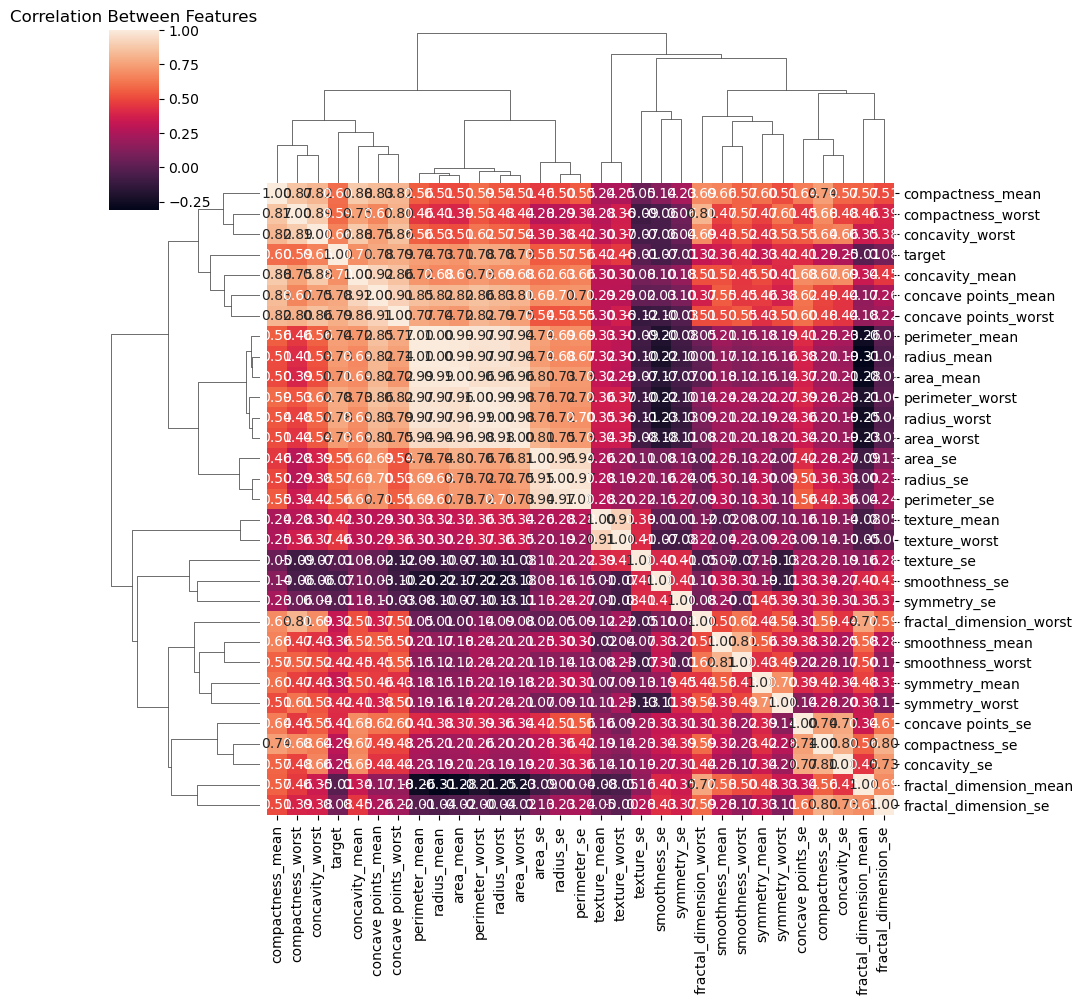

In [14]:
# EDA
# Correlation:  iki niceliksel değişken arasındaki doğrusal ilişkinin gücünü ve yönünü özetler
#  Veri setinizdeki değişkenler arasındaki korelasyonu gösteren bir ısı haritası oluşturur.
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

In [15]:
# there some correlated features

Text(0.5, 1.0, 'Correlation Between Features w Corr Threshold 0.75')

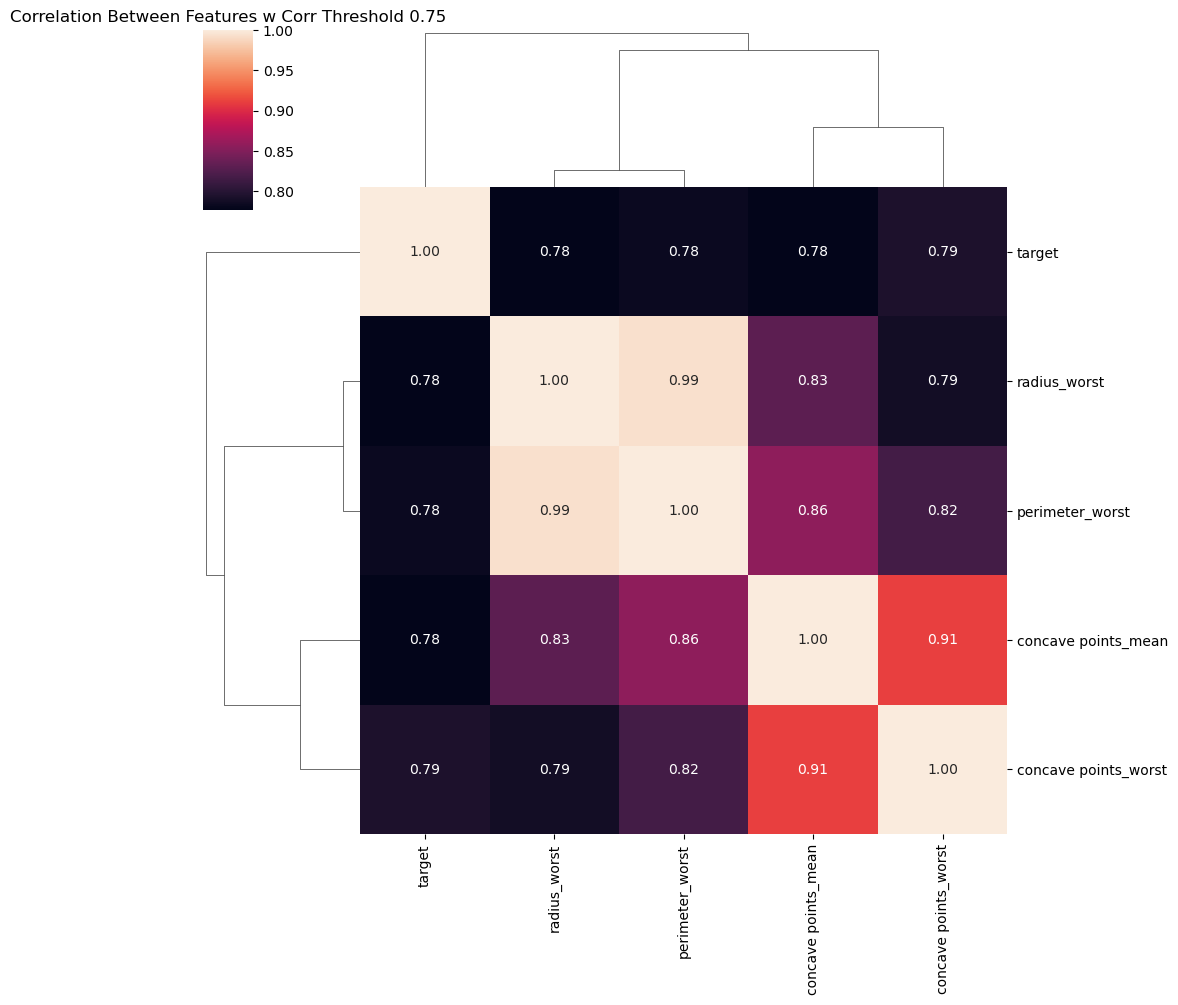

In [16]:
# özel bir eşik değeri kullanarak bir filtreleme işlemi gerçekleştirir ve ardından bu filtrelenmiş değişkenler arasındaki korelasyonları görselleştirir. 

threshold = 0.75
filtre = np.abs(corr_matrix["target"]) > threshold

# eşik değerini aşan korelasyonlara sahip değişkenlerin adlarını içerecektir.
corr_features = corr_matrix.columns[filtre].tolist()

#korelasyon katsayılarını ısı haritasının hücrelerine eklemek ve onları ondalık sayı formatında göstermek için kullanılır.
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")

plt.title("Correlation Between Features w Corr Threshold 0.75")


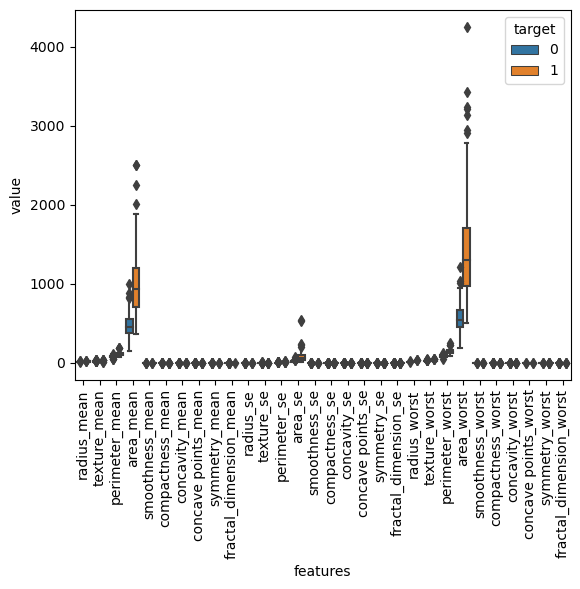

In [17]:
# box plot
# Pandas.melt(), bir DataFrame'in geniş formattan uzun formata özetini açar.
data_melted = pd.melt(data, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)

# rotation=90: x ekseni etiketlerinin 90 derece döndürülmesini sağlar.
plt.xticks(rotation = 90)
plt.show()


In [18]:
# standardization-normalization

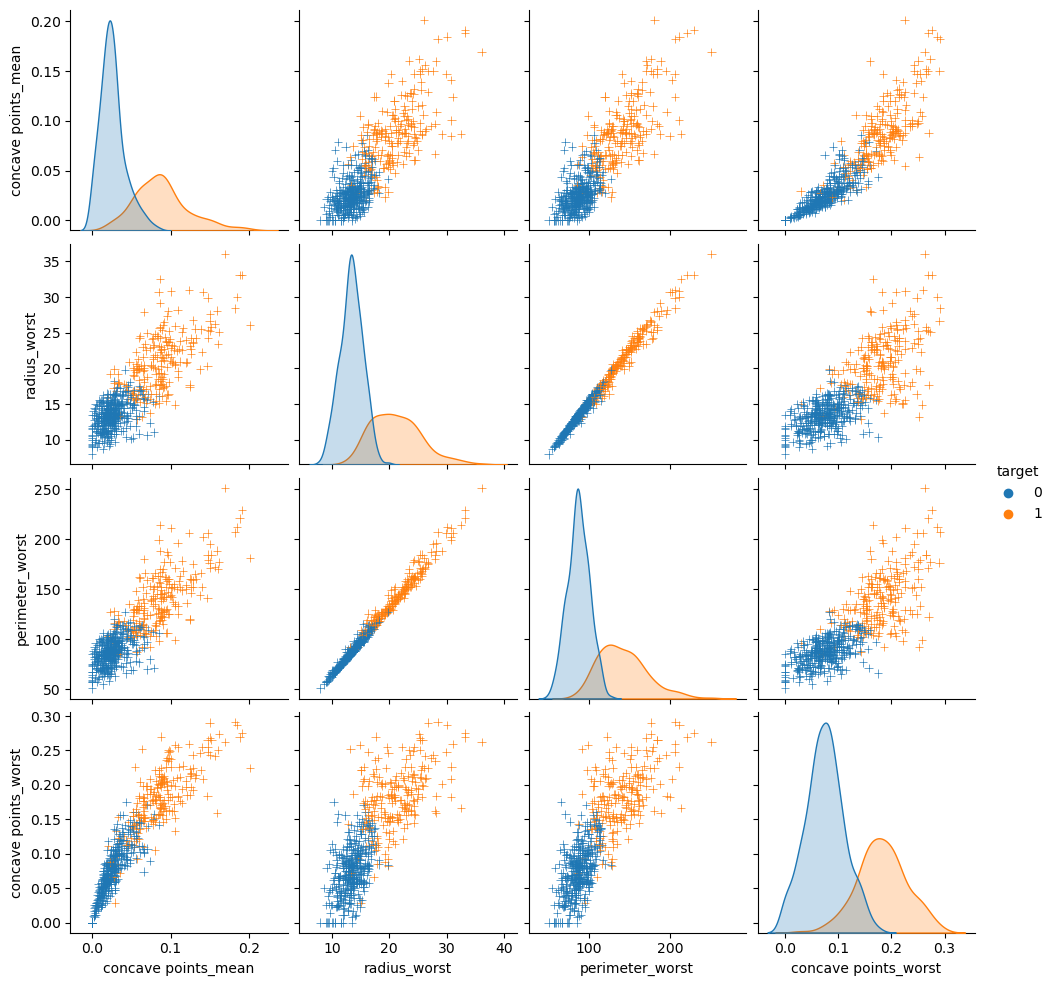

In [19]:
# box plot'tan cok birşey anlamadığımızdan standartization yapıyoruz

# pair plot
#  Seaborn'un pairplot fonksiyonunu kullanarak bir çift plot oluşturur. 
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()


In [20]:
# skewness

# Çarpıklık, veri analizi ve istatistiksel analizlerde önemli bir özelliktir. 
# Veri setinin çarpıklığı, verilerin nasıl dağıldığını ve merkezi eğilim ölçüleri olan ortalama ve medyan arasındaki ilişkiyi anlamamıza yardımcı olabilir. 
# Veri setinin çarpıklığını değerlendirmek için çeşitli istatistiksel metrikler ve grafiksel yöntemler kullanılır.
# Bir dağılım veya veri seti, pozitif çarpık (right-skewed), negatif çarpık (left-skewed) veya simetrik olabilir.

In [21]:
# Density Based Outlier (Yoğunluk Temelli Aykırı Değer Tespiti)

# Bir veri kümesindeki aykırı değerleri tanımlamak ve tespit etmek için kullanılan bir veri madenciliği ve makine öğrenimi tekniğidir. 

# Temel fikir, aykırı değerlerin, komşu noktalara göre önemli ölçüde daha düşük veri noktası yoğunluklarına sahip olan veri
# noktaları olduğu kavramına dayanmaktadır. 

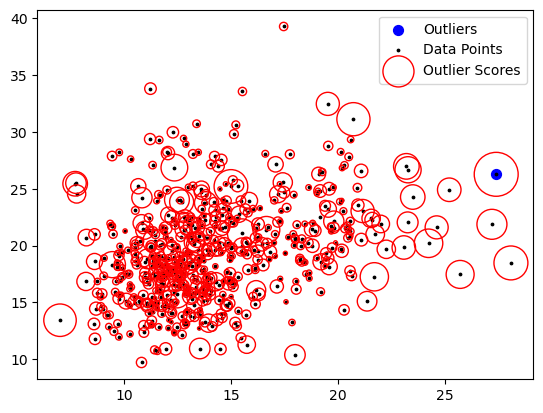

In [22]:
# %% outlier
#  bu kod, aykırı değerleri tespit eden LOF algoritmasını kullanır ve ardından bu aykırı değerleri veri setinden kaldırarak veri
# setini temizler. Bu, veri analizi ve modelleme için daha sağlıklı sonuçlar elde etmek için kullanışlı olabilir. 
y = data.target
x = data.drop(["target"],axis = 1)
columns = x.columns.tolist()

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)
X_score = clf.negative_outlier_factor_

outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

# threshold
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()


plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = "blue", s = 50, label = "Outliers")
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s = 3, label = "Data Points")

radius = (X_score.max() - X_score)/(X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors = "r",facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

# drop outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

In [23]:
# %% Train test split

#  bu kod, veriyi eğitim ve test alt kümelerine böler ve bu alt kümeleri ayrı değişkenlere (X_train, X_test, Y_train, ve Y_test)
# atar. Eğitim verisi, makine öğrenimi modelini eğitmek için kullanılırken, test verisi modelin performansını değerlendirmek 
# için kullanılır. Bu, modelin gerçek dünya verilerine nasıl genellenip genellenmediğini kontrol etmek için önemlidir.
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

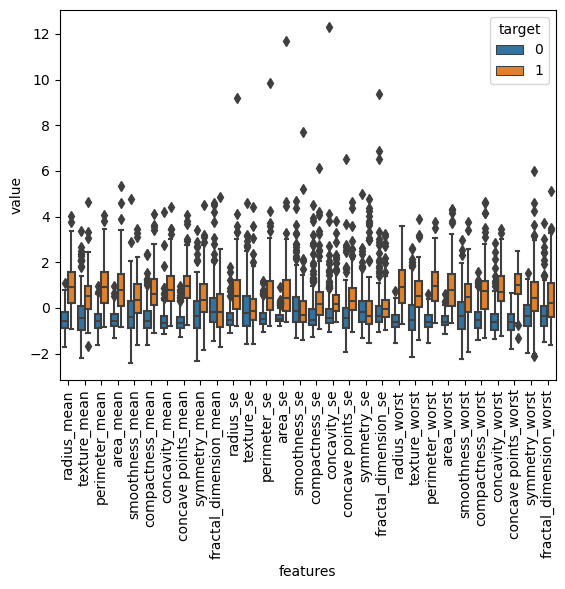

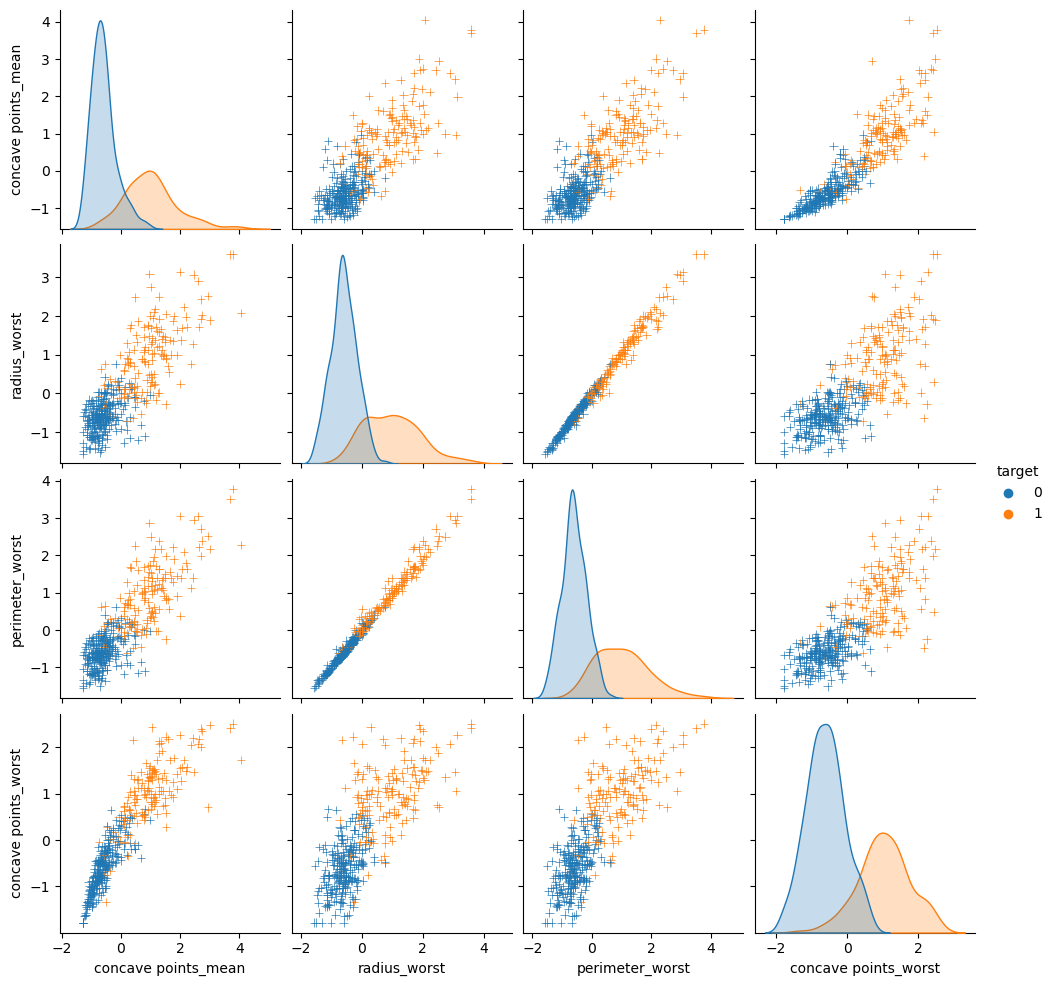

In [24]:
# bu kod önce veriyi standartlaştırır, sonra kutu grafikleri ve çift grafikler oluşturarak verinin dağılımını ve ilişkilerini 
# görsel olarak incelemeye yardımcı olur. 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df["target"] = Y_train
# box plot 
data_melted = pd.melt(X_train_df, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()


# pair plot 
sns.pairplot(X_train_df[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

In [25]:
# %% Basic KNN Method
# Bu kod, KNN sınıflandırma algoritması kullanarak bir model oluşturur, bu modeli eğitir ve test verisi üzerinde performansını 
# değerlendirir. Elde edilen sonuçlar, modelin sınıflandırma yeteneğini ve doğruluğunu gösterir.

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
score = knn.score(X_test, Y_test)
print("Score: ",score)
print("CM: ",cm)
print("Basic KNN Acc: ",acc)

Score:  0.9532163742690059
CM:  [[108   1]
 [  7  55]]
Basic KNN Acc:  0.9532163742690059


In [26]:
# %% choose best parameters

def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score: {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid
    
    
grid = KNN_Best_Params(X_train, X_test, Y_train, Y_test)


Best training score: 0.9670512820512821 with parameters: {'n_neighbors': 4, 'weights': 'uniform'}

Test Score: 0.9590643274853801, Train Score: 0.9773299748110831

CM Test:  [[107   2]
 [  5  57]]
CM Train:  [[248   0]
 [  9 140]]



Best training score: 0.9419230769230769 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.9239766081871345, Train Score: 0.947103274559194

CM Test:  [[103   6]
 [  7  55]]
CM Train:  [[241   7]
 [ 14 135]]


Text(0.5, 1.0, "2-Class classification (k = 9, weights = 'uniform')")

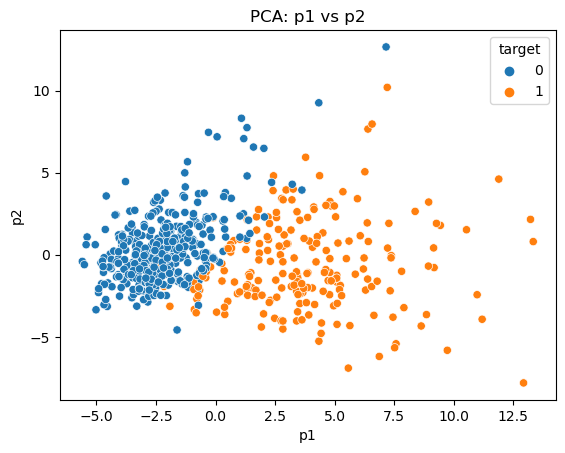

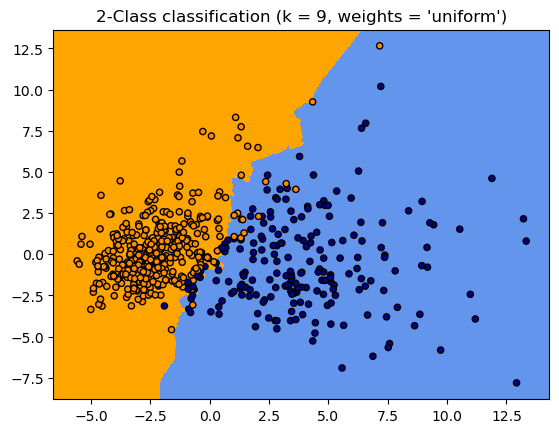

In [27]:
# %% PCA

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")


X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)

grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)

# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = X_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))


Best training score: 0.9873076923076922 with parameters: {'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.9941520467836257, Train Score: 1.0

CM Test:  [[108   1]
 [  0  62]]
CM Train:  [[248   0]
 [  0 149]]


Text(0.5, 1.0, "2-Class classification (k = 1, weights = 'uniform')")

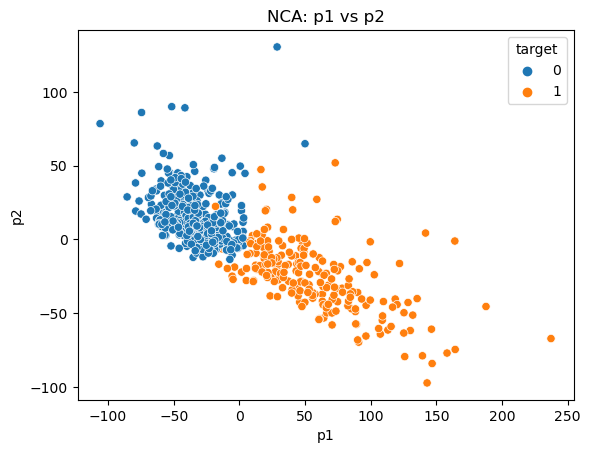

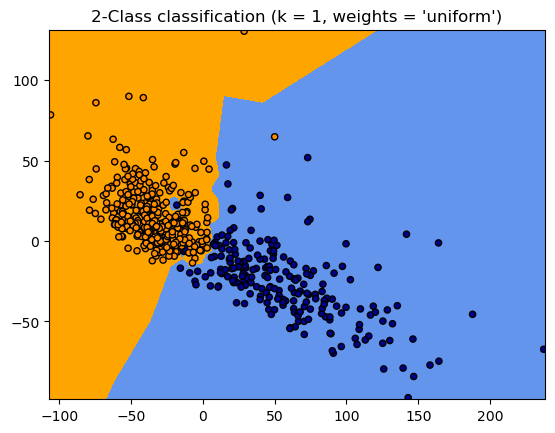

In [28]:
#%% NCA

nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y
sns.scatterplot(x = "p1",  y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")

X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = test_size, random_state = 42)

grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)

# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .2 # step size in the mesh
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))

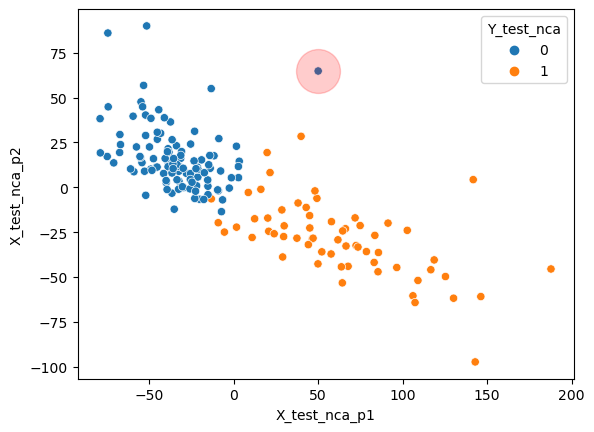

In [29]:
# %% find wrong decision
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
knn.score(X_test_nca,Y_test_nca)

test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = Y_test_nca

plt.figure()
sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="Y_test_nca",data=test_data)

diff = np.where(y_pred_nca!=Y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 1000)
